In [1]:
#1. 4.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# a black image
image_b = np.zeros((300, 300, 3), dtype=np.uint8)


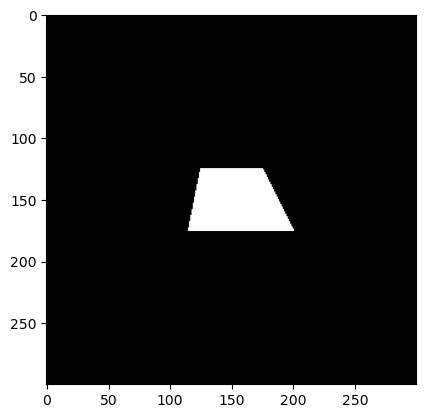

In [4]:

# points for an irregular quadrilateral
pts = np.array([[125, 125], [115, 175], [200, 175], [175, 125]], np.int32)
pts = pts.reshape((-1, 1, 2))

# quadrilateral in white
cv2.fillPoly(image_b, [pts], (255, 255, 255))

plt.imshow(image_b)

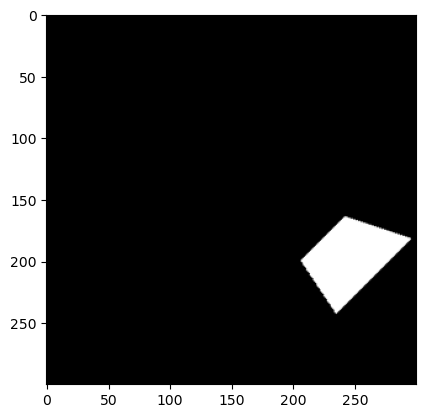

In [5]:
# Translate 
M_translate = np.float32([[1, 0, 30], [0, 1, 100]])
translated = cv2.warpAffine(image_b, M_translate, (300, 300))

# Rotate
center = (150, 150)
M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(translated, M_rotate, (300, 300))

# Display 
plt.imshow(rotated)


In [6]:
#2. 2.1.

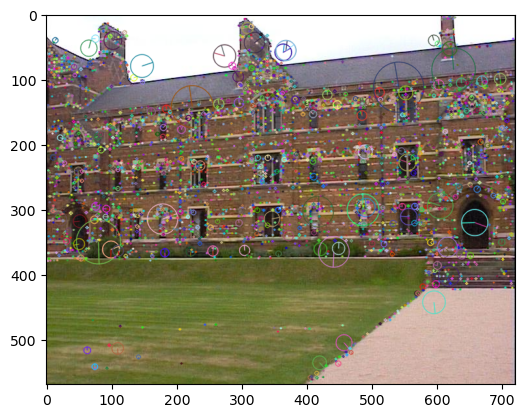

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




# Load images
image1 = cv2.imread('C:/Users/juver/Downloads/hw3/keble_a.jpg')
image2 = cv2.imread('C:/Users/juver/Downloads/hw3/keble_b.jpg')
image3 = cv2.imread('C:/Users/juver/Downloads/hw3/keble_c.jpg')

#SIFT
sift = cv2.SIFT_create()

# Method 2: Directly finding keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)
keypoints3, descriptors3 = sift.detectAndCompute(image3, None)

img=cv2.drawKeypoints(image1,keypoints1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

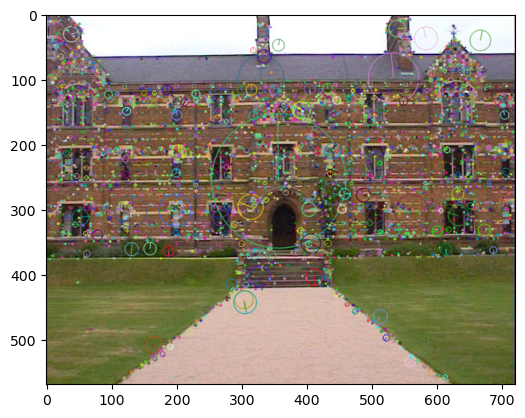

In [8]:
img=cv2.drawKeypoints(image2,keypoints2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

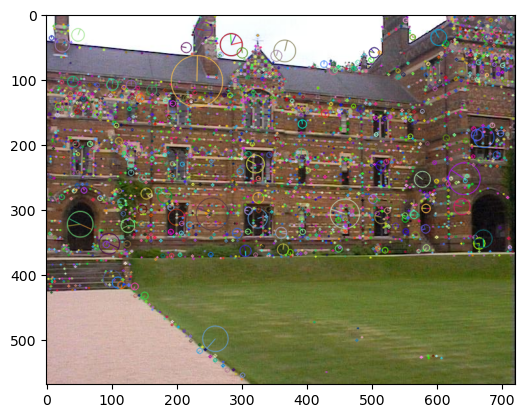

In [9]:
img=cv2.drawKeypoints(image3,keypoints3,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [10]:
def match_feature_descriptors(des1,des2):
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
 
    # Apply ratio test
    good = []
    for m,n in matches:
     if m.distance < 0.75*n.distance:
         good.append([m])
            
    return good


In [11]:
good12 = match_feature_descriptors(descriptors1, descriptors2)
good23 = match_feature_descriptors(descriptors2, descriptors3)

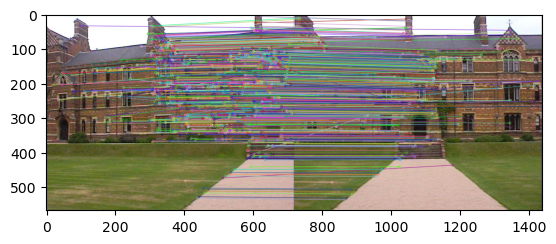

(<matplotlib.image.AxesImage at 0x124311d0af0>, None)

In [12]:
img3 = cv2.drawMatchesKnn(image1,keypoints1,image2,keypoints2,good12,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

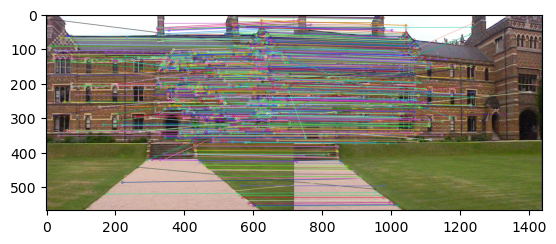

(<matplotlib.image.AxesImage at 0x124322d5c70>, None)

In [13]:
img3 = cv2.drawMatchesKnn(image2,keypoints2,image3,keypoints3,good23,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

In [14]:
print(good12)

[[< cv2.DMatch 00000124311218B0>], [< cv2.DMatch 0000012431123B30>], [< cv2.DMatch 00000124311245F0>], [< cv2.DMatch 0000012431124A30>], [< cv2.DMatch 0000012431124DB0>], [< cv2.DMatch 0000012431126230>], [< cv2.DMatch 00000124311280B0>], [< cv2.DMatch 0000012431128CB0>], [< cv2.DMatch 000001243112A8F0>], [< cv2.DMatch 000001243112EA30>], [< cv2.DMatch 0000012431132230>], [< cv2.DMatch 0000012431132BF0>], [< cv2.DMatch 0000012431136270>], [< cv2.DMatch 0000012431136570>], [< cv2.DMatch 0000012431136A30>], [< cv2.DMatch 0000012431136D30>], [< cv2.DMatch 00000124311387F0>], [< cv2.DMatch 0000012431138870>], [< cv2.DMatch 000001243113A8B0>], [< cv2.DMatch 000001243113A970>], [< cv2.DMatch 000001243113AAF0>], [< cv2.DMatch 000001243113AEF0>], [< cv2.DMatch 000001243113C130>], [< cv2.DMatch 000001243113C230>], [< cv2.DMatch 000001243113C3B0>], [< cv2.DMatch 000001243113C4B0>], [< cv2.DMatch 000001243113CAF0>], [< cv2.DMatch 000001243113CEB0>], [< cv2.DMatch 000001243113E030>], [< cv2.DMatch

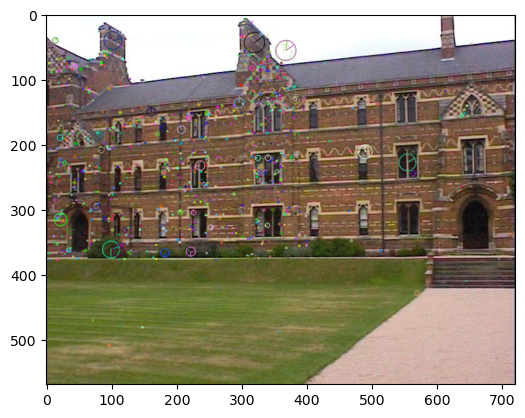

In [15]:
# threshold
threshold = 4054

# Extracting keypoints from cv2.DMatch objects
if isinstance(good12[0], cv2.DMatch):
    keypoints1_to_draw = [keypoints1[match.trainIdx] for match in good12 if match.trainIdx <= threshold]
else:
    keypoints1_to_draw = [keypoints1[match[0].trainIdx] for match in good12 if match[0].trainIdx <= threshold]

# Draw keypoints
img = cv2.drawKeypoints(image1, keypoints1_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


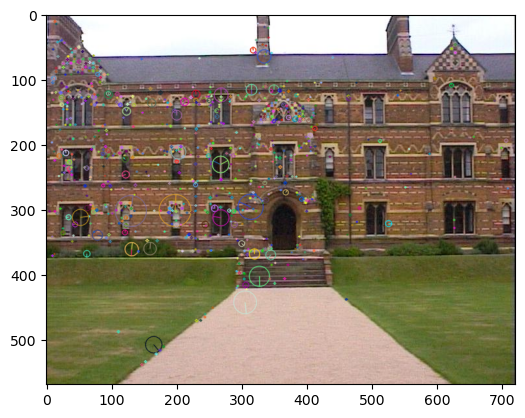

In [16]:
# Extracting keypoints from cv2.DMatch objects
keypoints2_to_draw = [keypoints2[match[0].trainIdx] for match in good12]

# Draw keypoints
img = cv2.drawKeypoints(image2, keypoints2_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


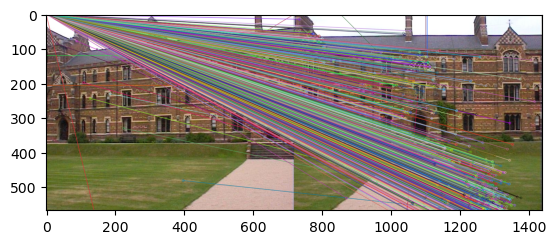

(<matplotlib.image.AxesImage at 0x1243193bfd0>, None)

In [17]:
img3 = cv2.drawMatchesKnn(image1,keypoints1_to_draw,image2,keypoints2_to_draw,good12,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

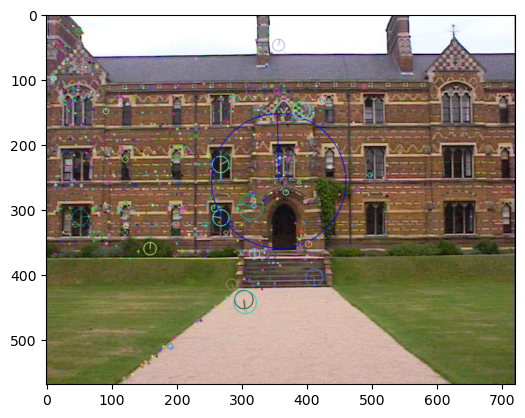

In [18]:
# Extracting keypoints from cv2.DMatch objects
keypoints2_to_draw = [keypoints2[match[0].trainIdx] for match in good23]

# Draw keypoints
img = cv2.drawKeypoints(image2, keypoints2_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


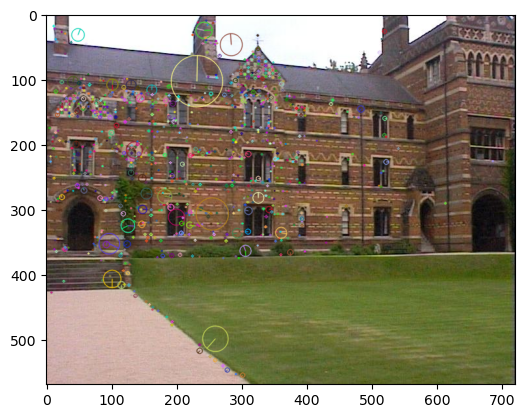

In [19]:
# Extracting keypoints from cv2.DMatch objects
keypoints3_to_draw = [keypoints3[match[0].trainIdx] for match in good23]

# Draw keypoints
img = cv2.drawKeypoints(image3, keypoints3_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


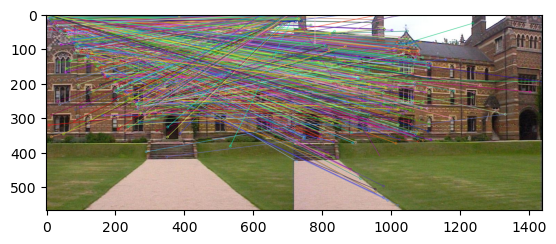

(<matplotlib.image.AxesImage at 0x12431f17a60>, None)

In [20]:
img3 = cv2.drawMatchesKnn(image2,keypoints2_to_draw,image3,keypoints3_to_draw,good23,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()


In [21]:
def computeH(im1_pts, im2_pts):
    #print(im1_pts)

    #for solving Ah = 0
    A = []
    for i in range(im1_pts.shape[1]):
        x, y = im1_pts[:, i]
        u, v = im2_pts[:, i]
        A.append([-x, -y, -1, 0, 0, 0, x*u, y*u, u])
        A.append([0, 0, 0, -x, -y, -1, x*v, y*v, v])
    A = np.array(A)

    # Perform SVD on A
    _, _, V = np.linalg.svd(A)
    
    #H = 3 x 3 matrix

    H = V[-1, :].reshape(3, 3)

    return H

In [22]:
def ransac(corr, thresh, iter):
    
    max_inliers = []
    H_max = None

    for _ in range(iter):
        # Randomly sample 4 point correspondences
        random_samples = np.random.choice(len(corr), 4, replace=False)
        random_sample_corr = [corr[i] for i in random_samples]

        # Estimate homography using the sampled correspondences
        im1_pts = np.array([pt[0] for pt in random_sample_corr]).T
        im2_pts = np.array([pt[1] for pt in random_sample_corr]).T
        H = computeH(im1_pts, im2_pts)

        # Compute inliers using the estimated homography
        inliers = []
        for pt1, pt2 in corr:
            pt1_hom = np.append(pt1, 1)
            pt2_est_hom = np.dot(H, pt1_hom)
            pt2_est = pt2_est_hom[:2] / pt2_est_hom[2]
            if np.linalg.norm(pt2 - pt2_est) < thresh:
                inliers.append((pt1, pt2))

        # Update maximum inliers
        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            H_max = H

    return H_max, max_inliers

In [23]:
# corresponding keypoints
ref_pts = np.float32([keypoints2[match[0].trainIdx].pt for match in good12])
img_pts = np.float32([keypoints1[match[0].queryIdx].pt for match in good12])

# (point in image1, point in image2)
corr = list(zip(img_pts, ref_pts))

H_max, _ = ransac(corr, thresh=7, iter=750)

In [24]:
print(H_max)

[[-3.36874877e-03  7.82252039e-05  9.86962883e-01]
 [-3.31427076e-04 -3.14746324e-03  1.60858397e-01]
 [-8.87377047e-07  7.90367463e-08 -2.73354767e-03]]


In [25]:
import numpy as np

In [26]:
np.save('C:\\Users\\juver\\good12.npy', H_max)

In [27]:
# corresponding keypoints
ref_pts = np.float32([keypoints3[match[0].trainIdx].pt for match in good23])
img_pts = np.float32([keypoints2[match[0].queryIdx].pt for match in good23])


# (point in image1, point in image2)
corr = list(zip(img_pts, ref_pts))
H_max, _ = ransac(corr, thresh=7, iter=750)

In [28]:
np.save('C:\\Users\\juver\\good23.npy', H_max)

In [29]:
print(H_max)

[[ 3.14641448e-03 -4.80628676e-05 -9.84749673e-01]
 [ 3.43206384e-04  2.95994364e-03 -1.73905661e-01]
 [ 8.78014064e-07  7.41741493e-08  2.47425115e-03]]


In [30]:
# Load the homography matrix from the file
H_max1 = np.load('C:\\Users\\juver\\good12.npy')


In [31]:
H_max2 = np.load('C:\\Users\\juver\\good23.npy')

In [32]:
#H_max1 = H1_2
#H_max2 = H2_3

In [33]:

warped_image1 = cv2.warpPerspective(image1, H_max1, (image2.shape[1], image2.shape[0]))

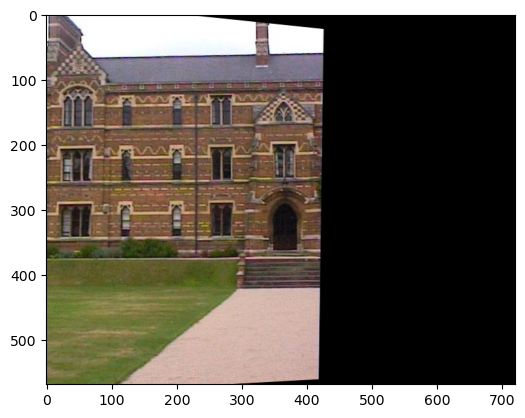

In [80]:
plt.imshow(cv2.cvtColor(warped_image1, cv2.COLOR_BGR2RGB))

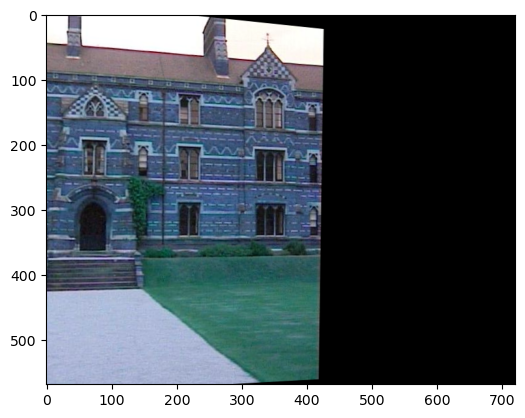

In [35]:
warped_image11 = cv2.warpPerspective(image2, H_max1, (image1.shape[1], image1.shape[0]))
plt.imshow(warped_image11)

In [36]:
warped_image1.shape

(568, 720, 3)

In [37]:
stitch2 = np.zeros((568, 720, 3), dtype=np.uint8)

stitch2[:, :420] = warped_image1[:, :420]

stitch2[:, 420:] = image2[:, 420:]

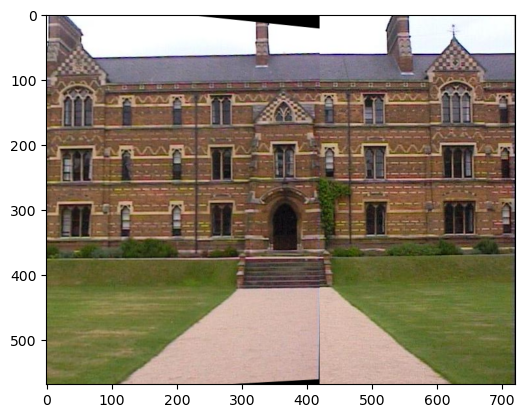

In [38]:
#plt.imshow(stitch2)
plt.imshow(cv2.cvtColor(stitch2, cv2.COLOR_BGR2RGB))

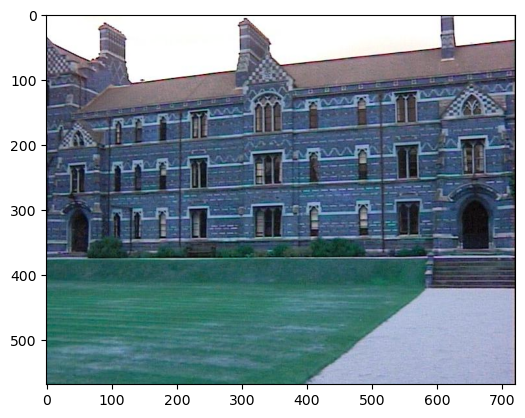

In [39]:
#plt.imshow(final_image)
plt.imshow(image1)

In [40]:
warped_image2 = cv2.warpPerspective(image3, H_max2, (image2.shape[1], image2.shape[0]))

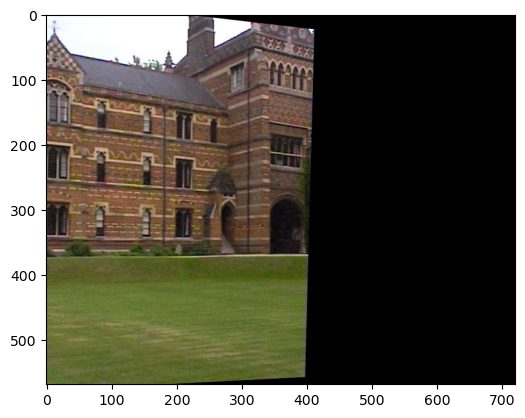

In [79]:
plt.imshow(cv2.cvtColor(warped_image2, cv2.COLOR_BGR2RGB))

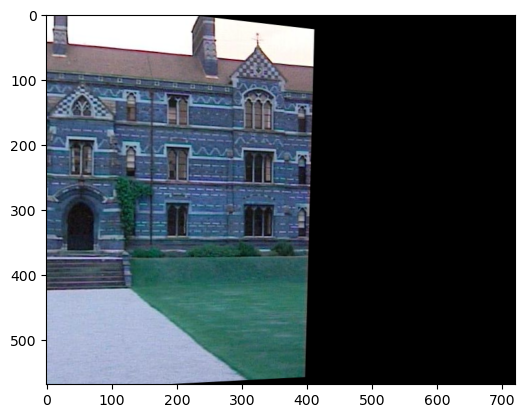

In [42]:
warped_image22 = cv2.warpPerspective(image2, H_max2, (image3.shape[1], image3.shape[0]))
plt.imshow(warped_image22)

In [43]:
stitch3 = np.zeros((568, 1010, 3), dtype=np.uint8)

stitch3[:, :610] = image2[:, :610]

stitch3[:, 610:] = warped_image2[:, :400]

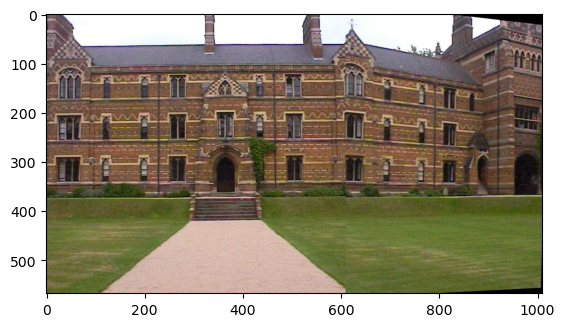

In [44]:
plt.imshow(cv2.cvtColor(stitch3, cv2.COLOR_BGR2RGB))

In [45]:
mosaic = np.zeros((568, 1060, 3), dtype=np.uint8)
mosaic[:, :270] = warped_image1[:, :270]
mosaic[:, 270:610] = image2[:, 270:610]
mosaic[:, 610:] = warped_image2[:, :450]

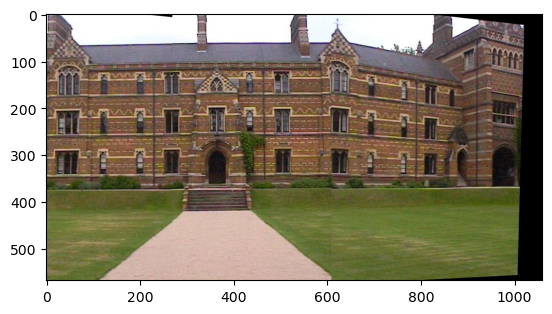

In [46]:
plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))

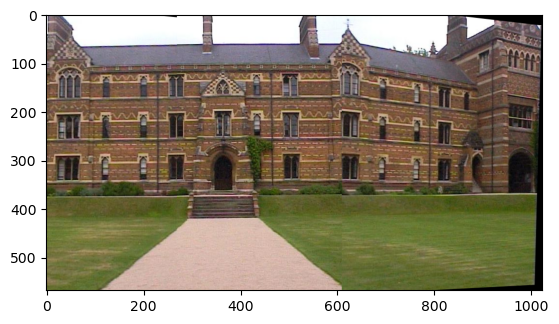

In [47]:
# 2.5 Extra credit
import cv2
import numpy as np

def non_black_rectangle(image):
    # grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # a binary image
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    
    # contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # initial largest area and the rectangle coordinates
    max_area = 0
    best_rect = (0, 0, 0, 0)
    
    # best bound rectangle, update max area and its rectangle coordinates
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > max_area:
            max_area = area
            best_rect = (x, y, w, h)
    
    # Crop the image to the largest found rectangle
    x, y, w, h = best_rect
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image


non_black = non_black_rectangle(mosaic)


plt.imshow( cv2.cvtColor( non_black, cv2.COLOR_BGR2RGB))


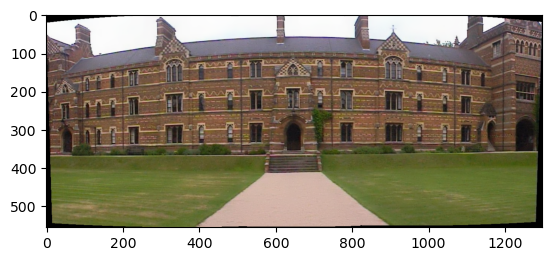

In [48]:
# 2.6
import cv2

def stitch_images(images):
    # Create a Stitcher object
    stitcher = cv2.Stitcher_create()
    
    # Attempt to stitch the images
    status, stitched_image = stitcher.stitch(images)
    if status == cv2.Stitcher_OK:
        return stitched_image
    return None


stitched_image = stitch_images([image1, image2, image3])

plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))

In [49]:
#2.7
# Load images
image4 = cv2.imread('C:/Users/juver/Downloads/hw3/xue.png')
image5 = cv2.imread('C:/Users/juver/Downloads/hw3/ye.png')

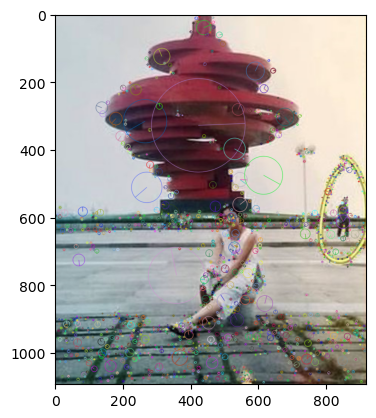

In [50]:
#SIFT
sift = cv2.SIFT_create()

# Method 2: Directly finding keypoints and descriptors
keypoints11, descriptors11 = sift.detectAndCompute(image4, None)
keypoints22, descriptors22 = sift.detectAndCompute(image5, None)

img=cv2.drawKeypoints(image4,keypoints11,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

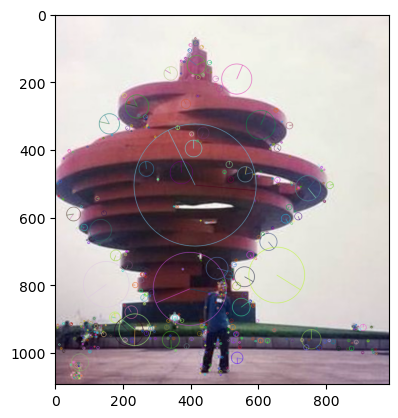

In [81]:
img=cv2.drawKeypoints(image5,keypoints22,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [52]:
good122 = match_feature_descriptors(descriptors11, descriptors22)

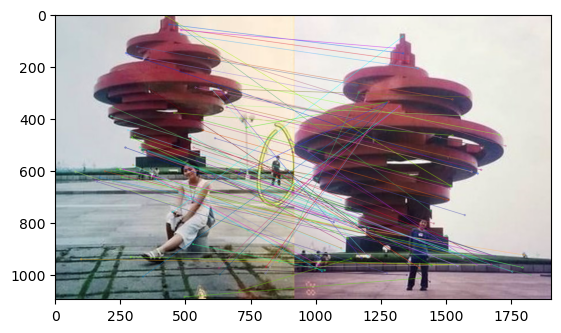

(<matplotlib.image.AxesImage at 0x12432d4e610>, None)

In [53]:
img3 = cv2.drawMatchesKnn(image4,keypoints11,image5,keypoints22,good122,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

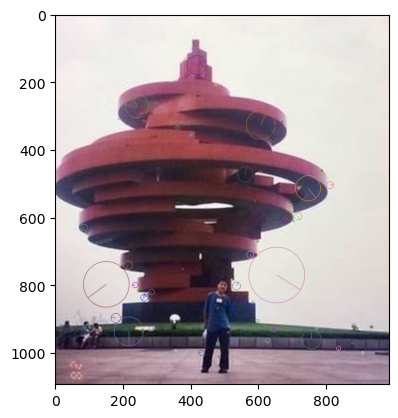

In [54]:
# Extracting keypoints from cv2.DMatch objects
keypoints22_to_draw = [keypoints22[match[0].trainIdx] for match in good122]

# Draw keypoints on the image
img = cv2.drawKeypoints(image5, keypoints22_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


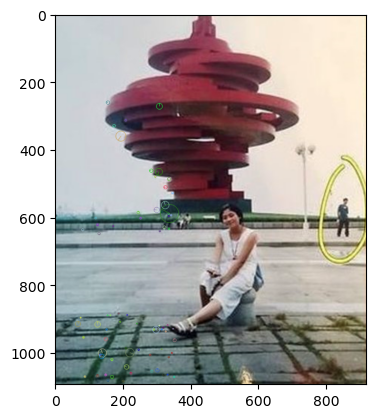

In [55]:
# Extracting keypoints from cv2.DMatch objects
keypoints11_to_draw = [keypoints11[match[0].trainIdx] for match in good122]

# Draw keypoints on the image
img = cv2.drawKeypoints(image4, keypoints11_to_draw, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


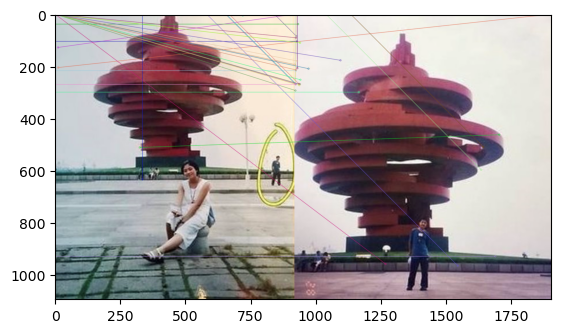

(<matplotlib.image.AxesImage at 0x12432eccbe0>, None)

In [56]:
img3 = cv2.drawMatchesKnn(image4,keypoints11_to_draw,image5,keypoints22_to_draw,good122,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

In [57]:
# Get corresponding keypoints
ref_pts = np.float32([keypoints22[match[0].trainIdx].pt for match in good122])
img_pts = np.float32([keypoints11[match[0].queryIdx].pt for match in good122])

# (point in image1, point in image2)
corr = list(zip(img_pts, ref_pts))

H_max_x, _ = ransac(corr, thresh=7, iter=750)

In [58]:
print(H_max_x)

[[ 6.60849797e-03 -2.62154156e-04 -9.20911422e-01]
 [ 2.81639825e-04  6.31770591e-03  3.89636678e-01]
 [ 2.92907295e-07 -2.82776622e-07  4.65597777e-03]]


In [59]:
warped_image11 = cv2.warpPerspective(image4, H_max1, (image5.shape[1], image5.shape[0]))

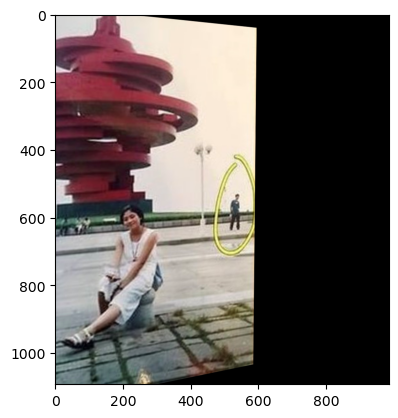

In [60]:
plt.imshow(cv2.cvtColor(warped_image11, cv2.COLOR_BGR2RGB))

In [61]:
warped_image22 = cv2.warpPerspective(image5, H_max1, (image4.shape[1], image4.shape[0]))

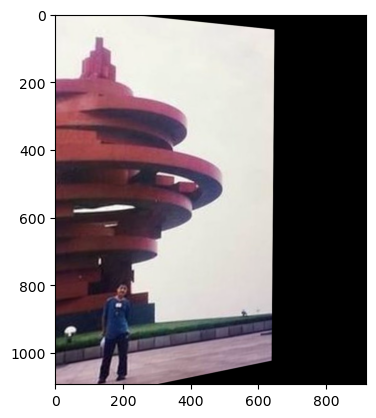

In [62]:
plt.imshow(cv2.cvtColor(warped_image22, cv2.COLOR_BGR2RGB))

In [63]:
warped_image22.shape

(1093, 920, 3)

In [64]:
stitch4 = np.zeros((1093, 1140, 3), dtype=np.uint8)

stitch4[:, :600] = image4[:, :600]

stitch4[:, 600:] = warped_image22[:, 110:650]

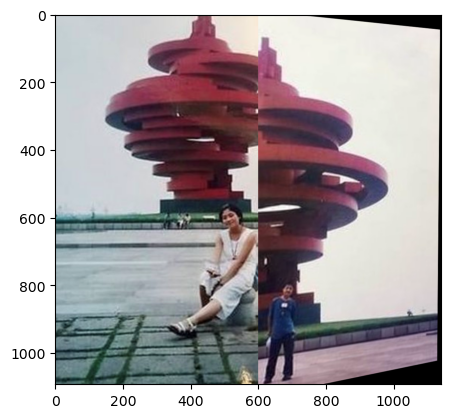

In [65]:
plt.imshow(cv2.cvtColor(stitch4, cv2.COLOR_BGR2RGB))

In [66]:
stitch5 = np.zeros((1093, 886, 3), dtype=np.uint8)

stitch5[:, :300] = warped_image11[:, :300]

stitch5[:, 300:] = image5[:, 400:]


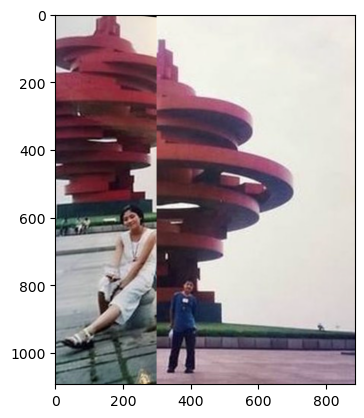

In [67]:
plt.imshow(cv2.cvtColor(stitch5, cv2.COLOR_BGR2RGB))

In [68]:

stitched_image1 = stitch_images([image4, image5])

if stitched_image1 is not None:

    plt.imshow(cv2.cvtColor(stitched_image1, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("No stitched image to display.")


No stitched image to display.


In [69]:
#plt.imshow(final_image)

In [70]:
#print(H1_2)

In [71]:
#print(H2_3)

In [72]:
print(good12[0])

[< cv2.DMatch 00000124311218B0>]


In [73]:
m=good12
type(m)

list

In [74]:
m[0]

[< cv2.DMatch 00000124311218B0>]

In [75]:
len(keypoints1)

4054

In [76]:
m[0]

[< cv2.DMatch 00000124311218B0>]

In [77]:
type(keypoints1)

tuple

In [78]:
import os
os.getcwd()

'C:\\Users\\juver'